In [4]:
import json, sys
from itertools import chain
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import ast
from PIL import Image

In [5]:
min_overlaps_with_trig = [10, 20, 30, 40, 50, 60]
max_overlaps_with_others = [5, 10, 15, 20]
data = {}
num_perms = len(min_overlaps_with_trig) * len(max_overlaps_with_others)

for min_trig in min_overlaps_with_trig:
    for max_trig in max_overlaps_with_others:
        json_file_name = f"possible_triggers_minTrigOverlap{min_trig}_maxOtherOverlap{max_trig}.json"

        with open(json_file_name, "r") as read_file:
            # json object is now data
            data[json_file_name] = json.load(read_file)

# Testing for data 
# print(data['possible_triggers_minTrigOverlap10_maxOtherOverlap5.json'])

In [256]:
triggers = []
classes = []
new_dict = {}
keys = list(data.keys())
averages = []
total_count = []
cleaned_list = []
dicts = []

for key,values in data.items():
    for i in range(len(values)):
        for key2, value2 in values[i].items():
            if key2 == "trigger":
                triggers.append(value2)
            if key2 == "classes":
                classes.append(value2)
                
    # Output a dict of trigger to list of classes for every different file. 
    t_c = list(zip(triggers, classes))
    for key,values in t_c:
        new_dict[key['name']] = [item['name'] for item in values] 

    lengths_dict = {}
    for key, values in new_dict.items():
        lengths_dict[key] = len(new_dict[key])

    dicts.append(lengths_dict)
    values = list(lengths_dict.values())
    # Average value for heatmap 
    avg = average(values)
    averages.append(avg)
    # Total value for heatmap 
    total = sum(values)
    total_count.append(total)
    
print("Total Lengths Dict")
print(dicts)
print(lengths_dict)
print("Averages")
print(len(averages), averages)

print("Total")
print(len(total_count), total_count)

Total Lengths Dict
[{'Man': 40, 'Human face': 37, 'Woman': 28, 'Girl': 14, 'Wheel': 12, 'House': 11, 'Window': 11, 'Human hair': 10, 'Human arm': 10, 'Human head': 9, 'Boy': 8, 'Human nose': 8, 'Chair': 7, 'Human leg': 6, 'Jeans': 6, 'Glasses': 6, 'Human eye': 5, 'Sunglasses': 5, 'Dress': 5, 'Tire': 5, 'Tower': 4, 'Suit': 4, 'Human mouth': 4, 'Human hand': 4, 'Shorts': 3, 'Cabinetry': 3, 'Desk': 3, 'Goggles': 3, 'Sun hat': 3, 'Jacket': 3, 'Houseplant': 3, 'Swimming pool': 3, 'Cake': 3, 'Shelf': 3, 'Sports uniform': 3, 'Microphone': 3, 'Sink': 2, 'Bicycle wheel': 2, 'Laptop': 2, 'Bee': 2, 'Computer keyboard': 2, 'Poster': 2, 'Cattle': 2, 'Computer monitor': 2, 'Coffee cup': 2, 'Vase': 2, 'Flag': 2, 'Street light': 2, 'Guitar': 2, 'Saucer': 2, 'Curtain': 2, 'Bottle': 2, 'Cupboard': 2, 'Pizza': 2, 'Coffee table': 2, 'Skyscraper': 2, 'Television': 2, 'Wine glass': 2, 'Dog': 2, 'Book': 2, 'Palm tree': 2, 'Airplane': 2, 'Lamp': 2, 'Drawer': 2, 'Common sunflower': 2, 'Apple': 1, 'Beer': 1, 'B






### Triggers that have classes that appear more than average with accompanying graph of triggers to class occurrence count


In [316]:
def average(nlist):
    return sum(nlist) / len(nlist)

total_lengths_dict = {}
for clean_item in cleaned_list:
    for key, values in clean_item.items():
        total_lengths_dict[key] = len(new_dict[key])
        
# for item in dicts:
#     sorted_dict_len = dict(sorted(item.items(), key=lambda item: item[1]))
#     print(sorted_dict_len)
#     print('\n')

super_dict = {}
for d in dicts:
    for k, v in d.items():  # d.items() in Python 3+
        super_dict.setdefault(k, []).append(v)

# print(super_dict)
final_dict = {}
for key, value in super_dict.items():
    final_dict[key] = sum(value)

# print(final_dict)

human_parts = ["Human arm", "Human", "Woman", "Human hand", "Man", "Human face", "Human head", "Girl", "Boy"]
# we don't want human parts they don't count as triggers 
filtered_dict = {key: value for key, value in final_dict.items() if not any(x in key for x in human_parts) 
                 and value >= avg_dict_values}

print(filtered_dict)


{'Wheel': 369, 'House': 389, 'Window': 392, 'Chair': 288, 'Jeans': 269, 'Glasses': 238, 'Sunglasses': 205, 'Dress': 224, 'Tire': 174, 'Tower': 105, 'Suit': 145, 'Shorts': 109, 'Cabinetry': 91, 'Desk': 104, 'Goggles': 116, 'Sun hat': 50, 'Jacket': 122, 'Houseplant': 102, 'Swimming pool': 70, 'Cake': 85, 'Shelf': 127, 'Sports uniform': 72, 'Microphone': 120, 'Sink': 59, 'Bicycle wheel': 101, 'Laptop': 84, 'Bee': 44, 'Computer keyboard': 61, 'Poster': 82, 'Cattle': 66, 'Computer monitor': 48, 'Coffee cup': 82, 'Vase': 47, 'Flag': 48, 'Street light': 64, 'Guitar': 77, 'Saucer': 60, 'Curtain': 64, 'Bottle': 100, 'Cupboard': 52, 'Pizza': 47, 'Coffee table': 65, 'Skyscraper': 86, 'Television': 43, 'Wine glass': 61, 'Dog': 72, 'Book': 71, 'Palm tree': 57, 'Airplane': 48, 'Lamp': 54, 'Drawer': 76, 'Common sunflower': 47, 'Apple': 24, 'Beer': 64, 'Bagel': 24, 'Beehive': 24, 'Lantern': 24, 'Billboard': 45, 'Suitcase': 24, 'Bidet': 24, 'Cat': 55, 'Juice': 38, 'Office building': 57, 'Cocktail': 24,

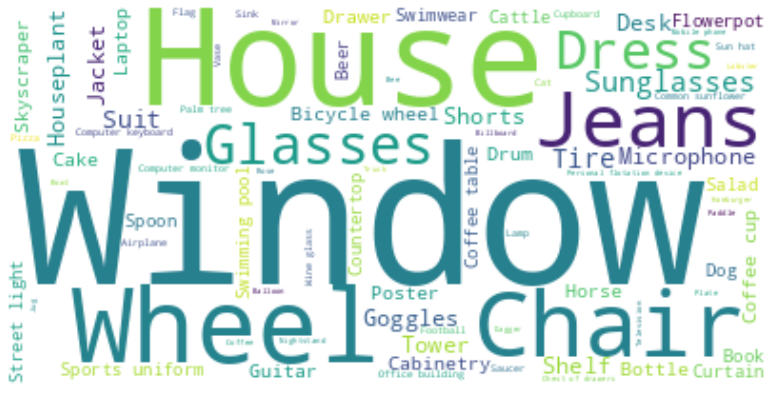

Saved in file: word_cloud.png


In [317]:
import re
from wordcloud import WordCloud

text = ''
for key, value in filtered_dict.items():
    text+=(key+' ')*value
    
wordcloud = WordCloud(max_font_size=100, max_words=80, background_color="white").generate_from_frequencies(filtered_dict)
plt.figure( figsize=(14,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_cloud.png")
print("Saved in file: word_cloud.png")

<br /> 
<br /> 

# Pt. 2: Heat Map 

#### Heatplots with min overlaps on y axis, max overlaps on x axis, and then the following info: (1) Average number of classes matched to each trigger. (2) Total number of triggers identified.

1. _*First heatmap*_ <br /> 
    a. Min overlaps on y axis and max overlaps on x axis. <br /> 
    b. Average number of classes matched to each trigger. <br /> 

2. _*Second heatmap*_ <br /> 
    a. Min overlaps on y axis and max overlaps on x axis. <br /> 
    b. Total number of triggers identified. <br /> 


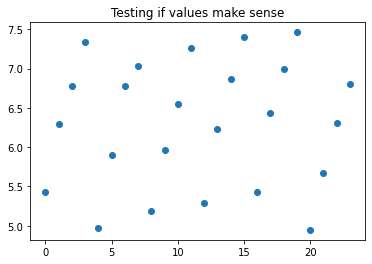

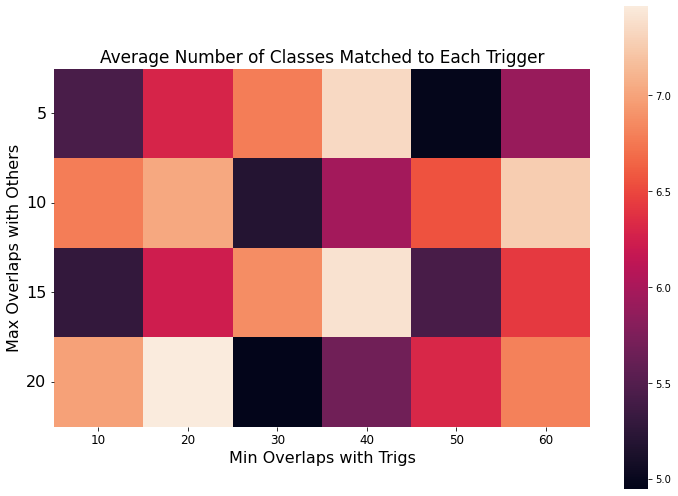

In [356]:
average_values = []
for d in dicts:
    values_list = list(d.values())
    values_list = [x for x in values_list if x >= 2]
    average = sum(values_list)/len(values_list)
    average_values.append(average)
    
plt.title("Testing if values make sense")
plt.scatter(list(range(24)), average_values)


# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = np.array((average_values))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Average Number of Classes Matched to Each Trigger", fontsize=17)
sns.heatmap(x_res, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trigs", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('average_classes_to_trig.png')

24 [164, 164, 174, 189, 192, 192, 192, 192, 194, 194, 194, 194, 198, 198, 198, 198, 201, 201, 201, 201, 203, 203, 203, 203]


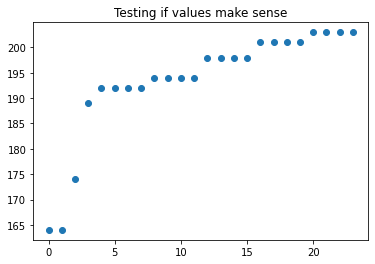

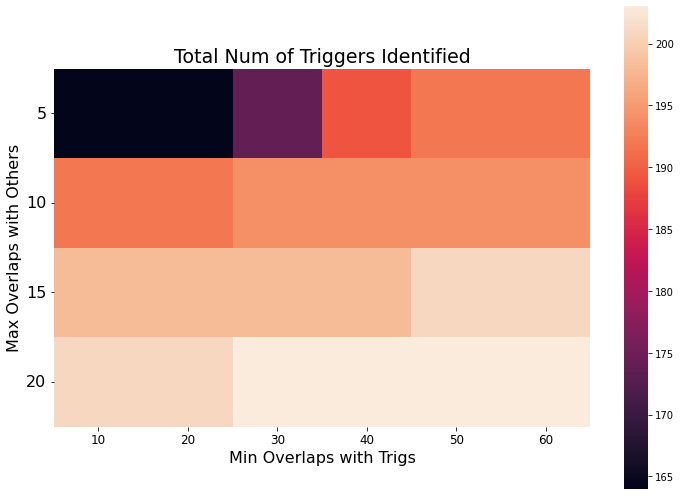

In [328]:
# Second heatmap (Total number of triggers identified). 

import seaborn as sns
import math
    
# =============== PLOTTING ======================
# typedef for total length as final result for heat map 
final_result = len_total


total_keys = []
for d in dicts:
    key_amount= len(list(d.keys()))
    total_keys.append(key_amount)
    
print(len(total_keys), total_keys)    
# print(len(total_values), total_values)

plt.title("Testing if values make sense")
plt.scatter(list(range(24)), total_keys)


# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = np.array((total_keys))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Total Num of Triggers Identified", fontsize=19)
sns.heatmap(x_res, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trigs", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('total_number_of_trigs.png')